## 프로젝트 형식
1.  분석 혹은 예측을 수행한 이유( 인사이트) 를 포함한 분석 방식과 결과ex_  인사이트 도출의 근거,  과제 수행 방식( 코드파일 캡쳐,  전체 코드는 X  일부만 O),  과제 수행 결과 시각화,  평가지표 등 제시
2.  분석 및 예측을 자유롭게 하되 결과물을 정리하여 읽는 사람을 설득시킬 수 있도록!
설득력있는 논리정연한 정리 必
3.  제출 형식은 pdf, word, ppt  등 자료 형식은 자유입니다.
4. 11 월 6 월 ~ 11 월 7 일까지 진행되는 프로젝트로 7일 오후 3시까지 제출 후 발표를 진행합니다.
오픈북, GPT 사용 가능합니다( 대신 코드를 설명할 수 있어야합니다!)

## 2년간자전거 대여 데이터

In [108]:
%pip install pandas numpy matplotlib seaborn scikit-learn # 필요한 라이브러리 한번에

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#': Expected package name at the start of dependency specifier
    #
    ^


In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
# 1. 데이터 불러오기

data = pd.read_csv('bike.csv')
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
# 데이터 이해 및 탐색

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB
None


In [112]:
print(data.describe())

             season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed        casual    registered  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      23.655084     61.886460     12.799395     36.021955    155.552177   
std        8.474601     19.245033      8.164537     49.96047

In [113]:
# data2 = pd.read_csv('winequality.csv')
# data2.info()

In [114]:
# 3. 결측치 처리

data.isnull().sum() # 결측치 없음

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [115]:
# 중복 확인 : 중복값 없음
data[data.duplicated()]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count


In [116]:
# 4. 이상치 탐지 및 처리

# 연속형 변수 리스트
continuous_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

# IQR 계산 함수
def get_iqr_bounds(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

# 각 열에 대해 IQR 계산
outliers = {}
for col in continuous_cols:
    lower_bound, upper_bound = get_iqr_bounds(data, col)
    outliers[col] = {'lower': lower_bound, 'upper': upper_bound}
outliers
# 이상치 탐지
for col in continuous_cols:
    lower_bound, upper_bound = outliers[col]['lower'], outliers[col]['upper']
    # 해당 범위를 벗어난 값들을 이상치로 표시
    outliers_in_col = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    print(f"{col} 열의 이상치 개수: {len(outliers_in_col)}")
    # print(outliers_in_col.head())

temp 열의 이상치 개수: 0
atemp 열의 이상치 개수: 0
humidity 열의 이상치 개수: 22
windspeed 열의 이상치 개수: 227
casual 열의 이상치 개수: 749
registered 열의 이상치 개수: 423
count 열의 이상치 개수: 300


In [117]:
# # 이상치 처리
# # (윈저화 : 데이터의 각 값이 지정된 범위를 벗어나는 지 확인하고
# # 이상치일 경우 상한선, 하한선으로 대체)

# # 원본 데이터를 그대로 두고, 이상치 처리 후 결과는 다른 변수에 저장
# data_copy = data.copy()

# # 각 열에 대해 이상치 처리
# for col in continuous_cols:
#     # 해당 열에 대한 하한선과 상한선 구하기
#     lower_bound, upper_bound = outliers[col]['lower'], outliers[col]['upper']
#     # 이상치 처리: 값이 범위를 벗어나면 상한선 또는 하한선으로 대체
#     data_copy[col] = data_copy[col].apply(
#         lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x)
#     )
# data_copy[col]

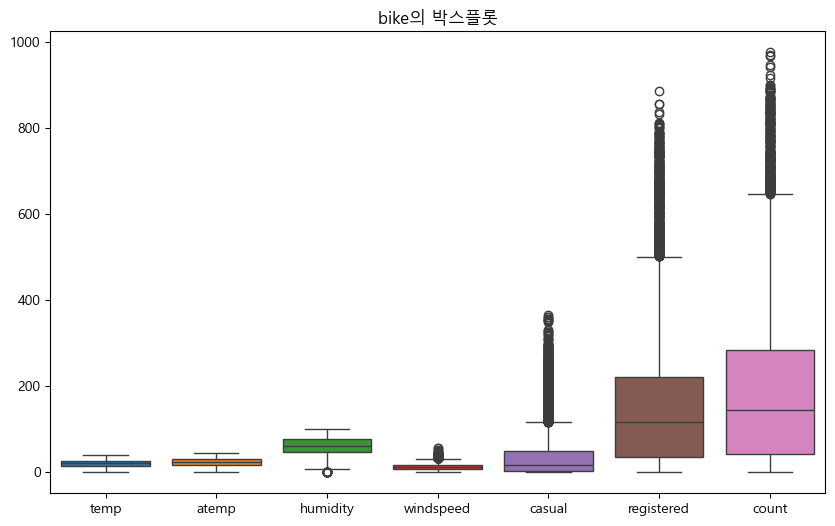

In [118]:
# 박스플롯 그리기
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[continuous_cols])
plt.title("bike의 박스플롯")
plt.show()

In [119]:
# # 박스플롯 그리기
# plt.figure(figsize=(10, 6))
# sns.boxplot(data=data_copy[continuous_cols])
# plt.title("이상치 처리 후 박스플롯")
# plt.xticks(rotation=45)
# plt.show()

In [120]:
# # 7. 스케일링(정규화)
# from sklearn.preprocessing import MinMaxScaler
# # MinMaxScaler 객체 생성
# scaler = MinMaxScaler()

# # 이상치 처리된 데이터를 정규화
# data_copy[continuous_cols] = scaler.fit_transform(data_copy[continuous_cols])

# # 정규화 후 데이터 확인
# data_copy[continuous_cols].head()

In [121]:
# 원본 정규화
from sklearn.preprocessing import MinMaxScaler
# MinMaxScaler 객체 생성
scaler = MinMaxScaler()

# 원본 데이터를 그대로 두고, 정규화된 데이터를 다른 변수에 저장
data_nor = data.copy()

# MinMaxScaler 객체 생성
scaler = MinMaxScaler()

# 원본 데이터에서 연속형 변수 정규화
data_nor[continuous_cols] = scaler.fit_transform(data_nor[continuous_cols])

# 정규화 후 데이터 확인
print(data_nor[continuous_cols].head())


       temp     atemp  humidity  windspeed    casual  registered     count
0  0.224490  0.305068      0.81        0.0  0.008174    0.014673  0.015369
1  0.204082  0.288064      0.80        0.0  0.021798    0.036117  0.039959
2  0.204082  0.288064      0.80        0.0  0.013624    0.030474  0.031762
3  0.224490  0.305068      0.75        0.0  0.008174    0.011287  0.012295
4  0.224490  0.305068      0.75        0.0  0.000000    0.001129  0.000000


In [122]:
# # 이상치 처리와 정규화한 2x4 서브플롯 생성 (2행 4열, 7개의 변수에 맞게 조정)
# fig, axs = plt.subplots(2, 4, figsize=(15, 8))  # 2x4 서브플롯, 크기 (15, 8)

# # 각 연속형 변수에 대해 서브플롯을 그리기
# for i, col in enumerate(continuous_cols):
#     ax = axs[i // 4, i % 4]  # 서브플롯의 위치 지정
#     ax.hist(data_copy[col], bins=20, color='lightgreen', edgecolor='black')  # 히스토그램
#     ax.set_title(f'{col} : 이상치 처리한 정규화된 데이터')  # 타이틀 설정
#     ax.set_xlabel(col)  # x축 레이블 설정
#     ax.set_ylabel('빈도')  # y축 레이블 설정

# # 서브플롯 간 간격 조정
# plt.tight_layout()
# plt.show()


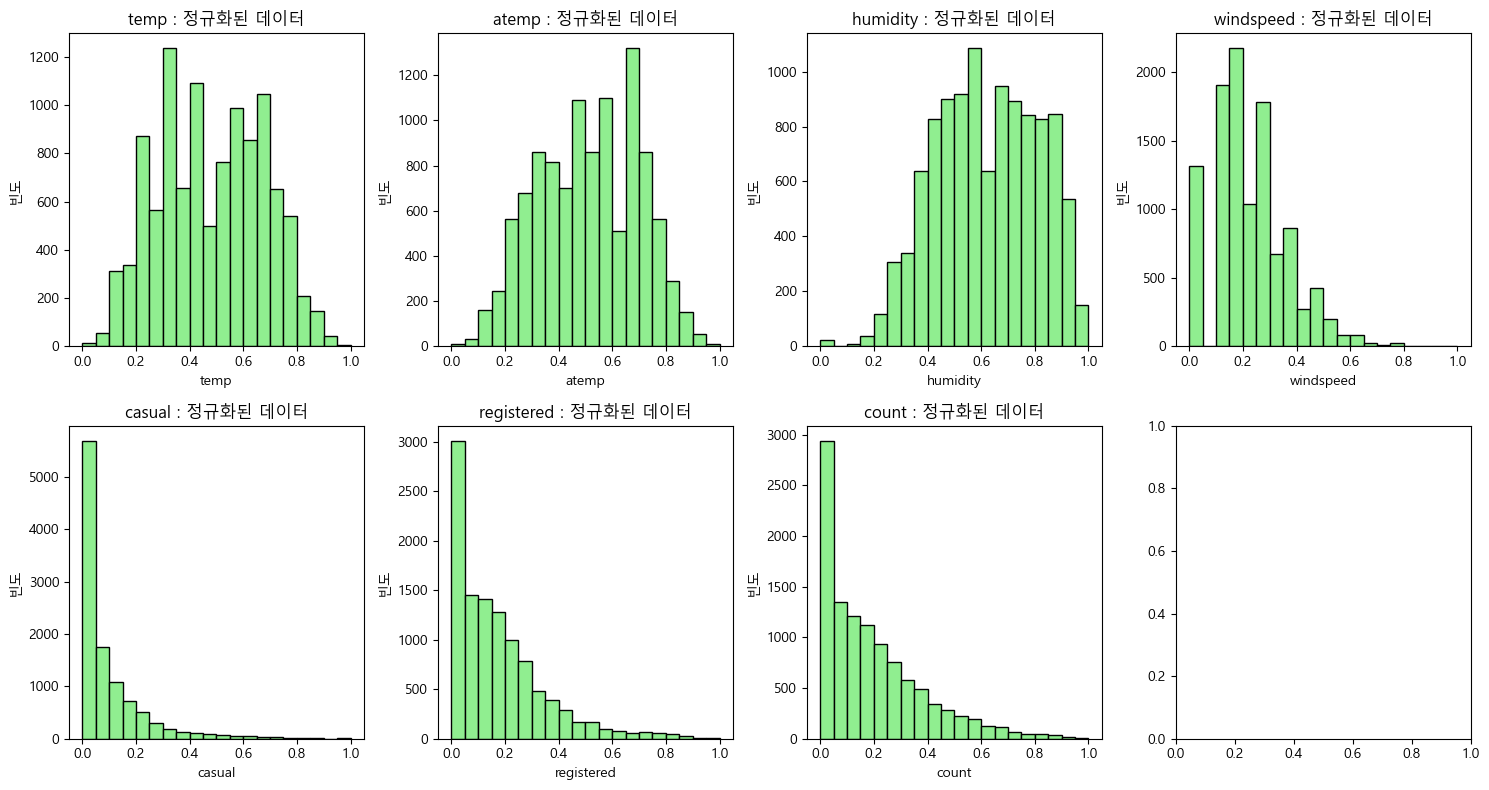

In [123]:
# 정규화한 2x4 서브플롯 생성 (2행 4열, 7개의 변수에 맞게 조정)
fig, axs = plt.subplots(2, 4, figsize=(15, 8))  # 2x4 서브플롯, 크기 (15, 8)

# 각 연속형 변수에 대해 서브플롯을 그리기
for i, col in enumerate(continuous_cols):
    ax = axs[i // 4, i % 4]  # 서브플롯의 위치 지정
    ax.hist(data_nor[col], bins=20, color='lightgreen', edgecolor='black')  # 히스토그램
    ax.set_title(f'{col} : 정규화된 데이터')  # 타이틀 설정
    ax.set_xlabel(col)  # x축 레이블 설정
    ax.set_ylabel('빈도')  # y축 레이블 설정

# 서브플롯 간 간격 조정
plt.tight_layout()
plt.show()


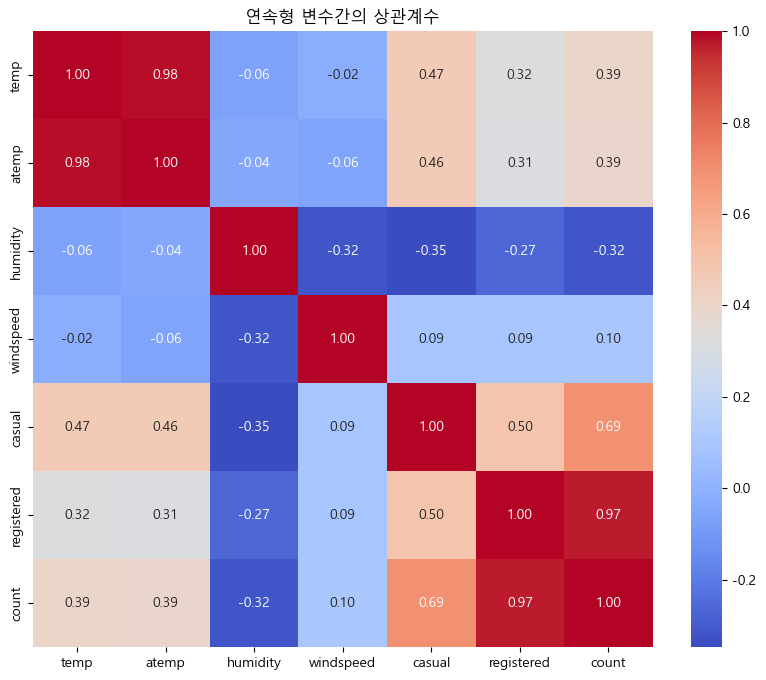

In [124]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr

# 연속형 변수 간 상관계수 계산 (피어슨 상관계수)
corr_matrix = data_nor[continuous_cols].corr()  # 연속형 변수 + 타겟 변수
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("연속형 변수간의 상관계수")
plt.show()

C:\Users\RMARKET\AppData\Local\Temp\ipykernel_8124\30102761.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=feature, y='count', ax=ax, palette='Blues')
C:\Users\RMARKET\AppData\Local\Temp\ipykernel_8124\30102761.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=feature, y='count', ax=ax, palette='Blues')
C:\Users\RMARKET\AppData\Local\Temp\ipykernel_8124\30102761.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=feature, y='count', ax=ax, palette='Blues')
C:\Users\RMARKET\AppData\Local\Temp\i

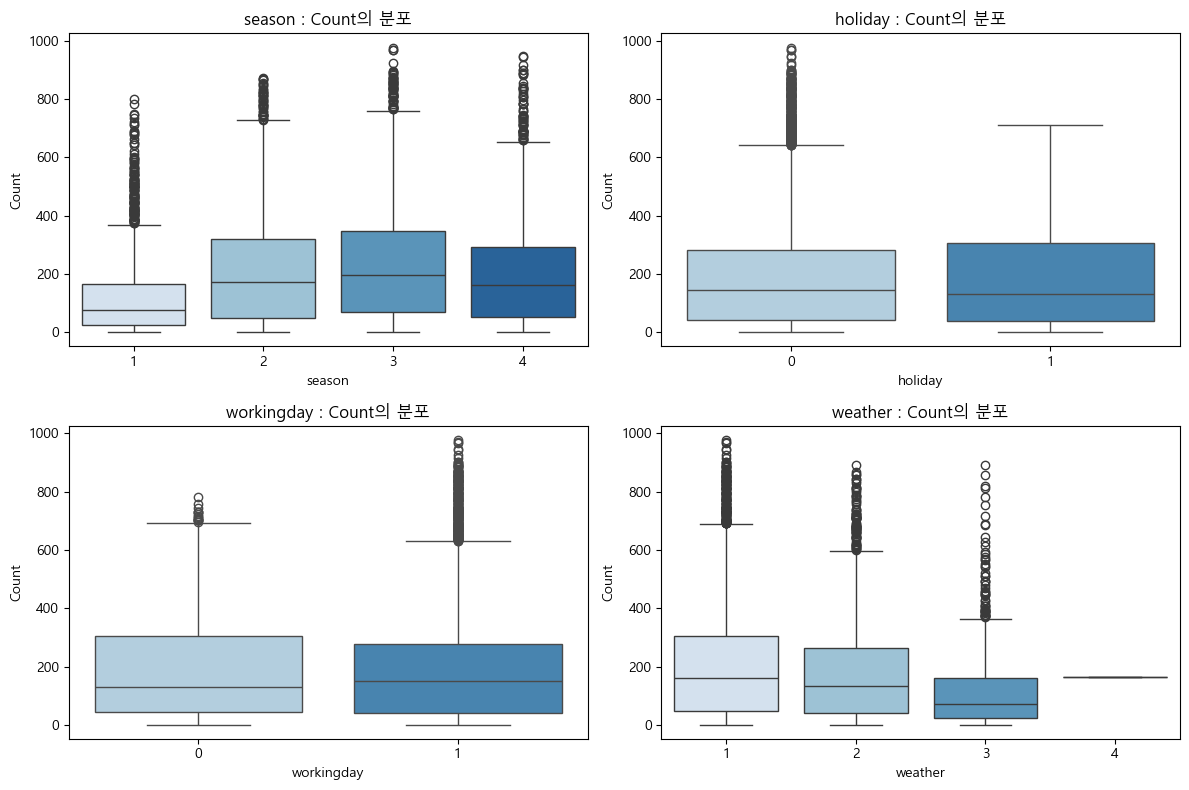

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns

# 범주형 변수 리스트
features = ['season', 'holiday', 'workingday', 'weather']

# 서브플롯 생성 (2x2 형태로)
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# 범주형 변수 별로 박스 플롯 그리기
for i, feature in enumerate(features):
    ax = axs[i//2, i%2]
    
    # 박스 플롯 생성
    sns.boxplot(data=data, x=feature, y='count', ax=ax, palette='Blues')

    # 제목, x축, y축 레이블 설정
    ax.set_title(f'{feature} : Count의 분포')
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')

# 서브플롯 간 간격을 조정하여 겹침 방지
plt.tight_layout()
plt.show()


Correlation of categorical variables:
              season   holiday  workingday   weather
season      1.000000  0.029368   -0.008126  0.008879
holiday     0.029368  1.000000   -0.250491 -0.007074
workingday -0.008126 -0.250491    1.000000  0.033772
weather     0.008879 -0.007074    0.033772  1.000000


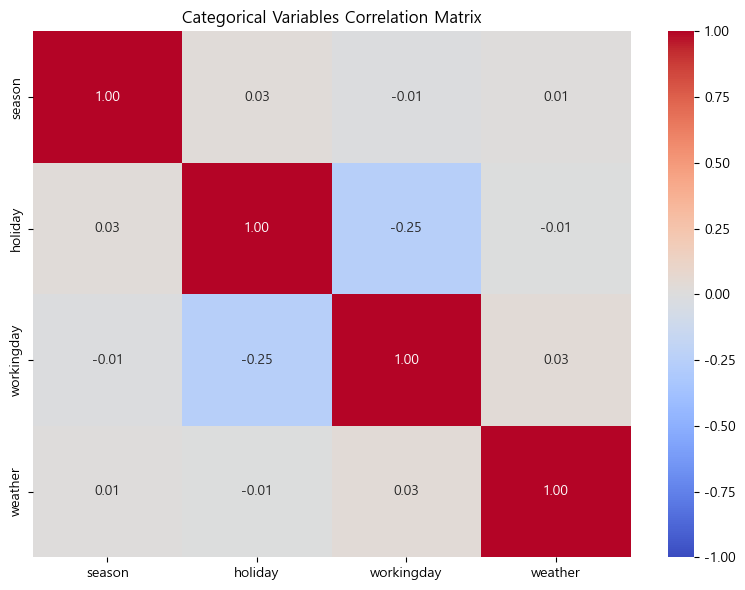

In [ ]:
# 범주형 변수들만 따로 선택
categorical_columns = ['season', 'holiday', 'workingday', 'weather']

# 범주형 변수들만 포함하는 새로운 데이터프레임 생성
categorical_data = data[categorical_columns]

# 범주형 변수들의 상관 행렬 계산
categorical_correlation_matrix = categorical_data.corr()

# 범주형 변수들 간의 상관 관계 출력
print("Correlation of categorical variables:")
print(categorical_correlation_matrix)

# 히트맵으로 범주형 변수들 간의 상관 행렬 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(categorical_correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Categorical Variables Correlation Matrix')
plt.tight_layout()
plt.show()


In [141]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score

X = data_nor[['temp', 'atemp', 'humidity', 'windspeed']]
y = data_nor['count']

# X2 = data.drop(['datetime', 'count'], axis=1)
# y2 = data['count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# 선형 회귀 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)
# model.fit(X2_train, y2_train)

# 예측
y_pred = model.predict(X_test)
# y2_pred = model.predict(X2_test)

print(f'기울기 : {model.coef_} \n예측값 : {y_pred}')

# 성능 평가
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R2 score: {r2:.2f}")

r2 = r2_score(y_test, y_pred)
print(f'결정계수 : {r2}')
rmse = root_mean_squared_error(y_test, y_pred)
print(f'평균 제곱근 오차(RMSE) : {rmse}') # 작을수록 좋다

기울기 : [ 0.09279313  0.27182946 -0.27868282  0.03177548] 
예측값 : [0.32688763 0.07328505 0.13480387 ... 0.22753265 0.06171108 0.21819865]
RMSE: 0.16
R2 score: 0.26
결정계수 : 0.25883611881349566
평균 제곱근 오차(RMSE) : 0.1602543807889283


In [130]:
df_compare = pd.DataFrame({
    '실제 값' : y_test,
    '예측 값' : y_pred
})
df_compare

,실제 값,예측 값
3133,0.129098,0.326888
5786,0.012295,0.073285
5224,0.165984,0.134804
8953,0.237705,0.279449
8054,0.226434,0.278863
...,...,...
1963,0.358607,0.264320
5807,0.001025,0.120256
10061,0.520492,0.227533
5427,0.004098,0.061711


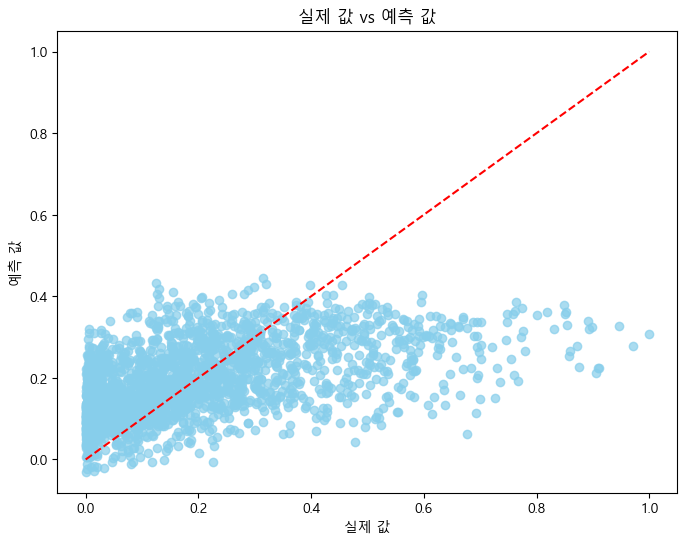

In [140]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='skyblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('실제 값')
plt.ylabel('예측 값')
plt.title('실제 값 vs 예측 값')
plt.show()
